In [1]:
### ATOC7500 - response_function_moving_avg
### Originally from Libby Barnes (Colorado State University)
### Additional commenting/code from Jennifer Kay (University of Colorado)
### Last updated November 9, 2020

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.signal as sig
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio

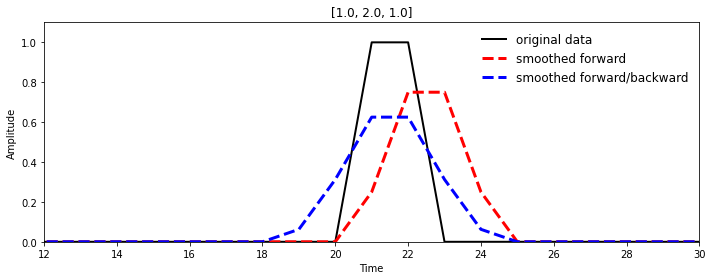

In [48]:
### Smoothing of the original data in the time domain
### Note: Is the red 1x smoothed supposed to be off center? yes!  
### When you only filter forward... you lose data at the end of the time series.

## create synthetic data
t = np.arange(1,40)
x = np.zeros(np.shape(t))
foo=round(np.size(t)/2)
foo1=round(foo+2)
x[foo:foo1] = np.ones((2,))
## you can try different response functions here....
g = [1.,2.,1.] ## 1-2-1
# g = [1.,1.,1.] ## run mean 3 (1-1-1)
# g = [1.,1., 1., 1.,1.] ## run mean 5
# g = [1., 1.,1., 1., 1.,1.,1.] ## run mean 7

## Filter in the time domain: apply 1-1-1 smoothing
y1 = sig.lfilter(g,np.sum(g),x)
## Filter in the time domain: apply 1-1-1 smoothing twice (forward/backward)
y2 = sig.filtfilt(g,np.sum(g),x)

f=plt.figure(figsize=(10,4))
plt.title('Original and Smoothed Data');
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t,x,'-k',linewidth = 2, label ='original data');
plt.plot(t,y1,'--r',linewidth = 3, label = 'smoothed forward' );
plt.plot(t,y2,'--b',linewidth = 3, label = 'smoothed forward/backward' );
plt.ylim(0,1.1);
plt.legend(fontsize = 12, frameon = False, loc='upper right');
plt.title(str(g))
plt.xlim(12,30)
f.tight_layout()

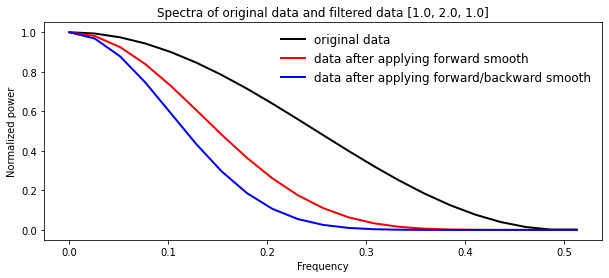

In [49]:
## Calculate the power spectra of original and filtered data
Z_x = np.fft.fft(x)/np.size(x)
Z_y1 = np.fft.fft(y1)/np.size(y1)
Z_y2 = np.fft.fft(y2)/np.size(y2)

Ck2_x = np.abs(Z_x[0:round(np.size(Z_x)/2) + 1])**2
Ck2_y1 = np.abs(Z_y1[0:round(np.size(Z_x)/2) + 1])**2
Ck2_y2 = np.abs(Z_y2[0:round(np.size(Z_x)/2) + 1])**2

freq = np.arange(0,np.size(x)/2+1)/float(np.size(x))

### Plot power spectra of the data and filtered data

f=plt.figure(figsize=(10,4))
plt.title('Spectra of original data and filtered data {}'.format(g));
maxval = np.max(Ck2_x)
plt.plot(freq,Ck2_x/maxval,'-k',linewidth = 2, label = 'original data');
maxval = np.max(Ck2_y1)
plt.plot(freq,Ck2_y1/maxval,'-r',linewidth = 2, label = 'data after applying forward smooth');
maxval = np.max(Ck2_y2)
plt.plot(freq,Ck2_y2/maxval,'-b',linewidth = 2, label = 'data after applying forward/backward smooth');
plt.legend(fontsize = 12, frameon = False, loc='upper right');
plt.xlabel('Frequency');
plt.ylabel('Normalized power');

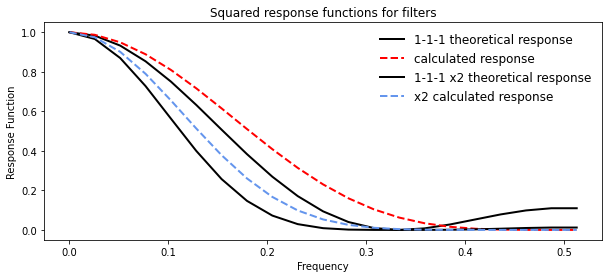

In [52]:
## Find the response function of the filters -- Barnes Equations 94-96
freq = np.arange(0,round(np.size(Z_x)/2)+1)/float(np.size(x))

## Theoretical Response Function 1-2-1  ## Barnes Eq. 108 page 26 Chapter 4
# Rg_y1 = 1./2 + (1./2)*np.cos(freq*2.*np.pi)
# Rg_y2 = (1./2 + (1./2)*np.cos(freq*2*np.pi))**2
# label1 = '1-2-1 theoretical response'
# label2 = 'x2 1-2-1 theoretical response'

## Theoretical Response Function 1-1-1
Rg_y1 = 1./3 + (2./3)*np.cos(freq*2.*np.pi)  ## Barnes Eq. 100 page 26 Chapter 4
Rg_y2 = (1./3 + (2./3)*np.cos(freq*2*np.pi))**2
label1 = '1-1-1 theoretical response'
label2 = '1-1-1 x2 theoretical response'

### Response Function
Rg2_y1 = Rg_y1**2
Rg2_y2 = Rg_y2**2

### Plot the response functions squared (to compare with directly with power C_k^2)
f=plt.figure(figsize=(10,4))
plt.title('Squared response functions for filters');
plt.plot(freq,Rg2_y1,'-k',linewidth = 2, label = label1);
plt.plot(freq,Ck2_y1/Ck2_x,'--r',linewidth = 2, label = 'calculated response');
plt.plot(freq,Rg2_y2,'-k',linewidth = 2, label = label2);
plt.plot(freq,Ck2_y2/Ck2_x,'--',color = 'cornflowerblue',linewidth = 2, label = 'x2 calculated response');
plt.legend(fontsize = 12, frameon = False,loc='upper right');
plt.ylabel('Response Function');
plt.xlabel('Frequency');